<a href="https://colab.research.google.com/github/ankitg-02/loan-approval/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as train_test_split
import sklearn.metrics as metrics


In [2]:
d=pd.read_csv(r'/content/loan.csv')

In [3]:
data=pd.DataFrame(d)

In [4]:
data.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [5]:
data.dtypes

age                 int64
gender             object
occupation         object
education_level    object
marital_status     object
income              int64
credit_score        int64
loan_status        object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [7]:
for i in data.columns:
  print(i,':','\n',data[i].unique())

age : 
 [32 45 28 51 36 24 42 29 37 48 55 31 26 39 44 27 34 41 30 53 38 25 46 33
 40 35 43 49 54 47 52 50]
gender : 
 ['Male' 'Female']
occupation : 
 ['Engineer' 'Teacher' 'Student' 'Manager' 'Accountant' 'Nurse' 'Lawyer'
 'Artist' 'IT' 'Doctor' 'Consultant' 'Analyst' 'Salesman' 'Marketing'
 'Architect' 'Designer' 'Pharmacist' 'Researcher' 'Professor' 'Pilot'
 'Receptionist' 'Banker' 'Writer' 'Chef' 'Veterinarian' 'Sales' 'HR'
 'Electrician' 'Realtor' 'Photographer' 'Editor' 'Programmer' 'Dentist'
 'Musician' 'Psychologist' 'Server' 'Software' 'Stylist']
education_level : 
 ["Bachelor's" "Master's" 'High School' "Associate's" 'Doctoral']
marital_status : 
 ['Married' 'Single']
income : 
 [ 85000  62000  25000 105000  75000  48000 120000  38000  92000 180000
 110000  68000  42000  78000  95000  52000  88000 125000  72000  98000
  80000  35000 115000  45000  60000  70000  90000  55000  65000  40000
 140000  30000 100000  28000  82000  58000  50000 130000 175000  32000]
credit_score : 
 

In [8]:
data.describe(include='all')

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
count,61.000000,61,61,61,61,61.000000,61.000000,61
unique,NaN,2,38,5,2,NaN,NaN,2
top,NaN,Male,Engineer,Bachelor's,Married,NaN,NaN,Approved
freq,NaN,31,5,23,37,NaN,NaN,45
mean,37.081967,NaN,NaN,NaN,NaN,78983.606557,709.836066,NaN
std,8.424755,NaN,NaN,NaN,NaN,33772.025802,72.674888,NaN
min,24.000000,NaN,NaN,NaN,NaN,25000.000000,560.000000,NaN
25%,30.000000,NaN,NaN,NaN,NaN,52000.000000,650.000000,NaN
50%,36.000000,NaN,NaN,NaN,NaN,78000.000000,720.000000,NaN
75%,43.000000,NaN,NaN,NaN,NaN,98000.000000,770.000000,NaN


In [9]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [10]:
data['gender'].value_counts()

gender
Male      31
Female    30
Name: count, dtype: int64

In [11]:
data['education_level'].value_counts()

education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64

In [12]:
data['marital_status'].value_counts()

marital_status
Married    37
Single     24
Name: count, dtype: int64

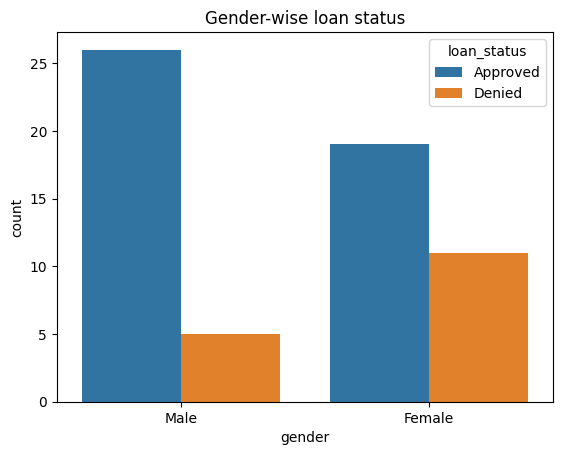

In [13]:
sns.countplot(x='gender',data=data,hue='loan_status')
plt.title('Gender-wise loan status')
plt.show()

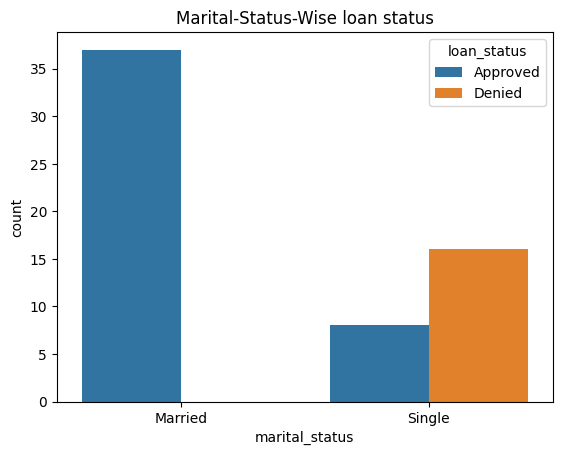

In [14]:
sns.countplot(x='marital_status',data=data,hue='loan_status')
plt.title('Marital-Status-Wise loan status')
plt.show()

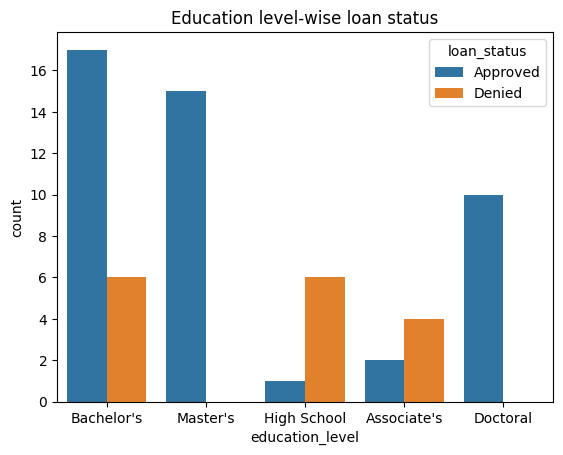

In [15]:
sns.countplot(data=data,x='education_level',hue='loan_status')
plt.title('Education level-wise loan status')
plt.show()

In [16]:
le=LabelEncoder()

In [17]:
mod_loan_status=le.fit_transform(data['loan_status'])
print(mod_loan_status)

[0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0]


In [18]:
mod_gender=le.fit_transform(data['gender'])
print(mod_gender)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [19]:
mod_data={'age':data['age'],
          'gender':mod_gender,
          'loan_status':mod_loan_status}

In [20]:
mod_data_1=pd.DataFrame(mod_data)

In [21]:
mod_data_1.head()

,age,gender,loan_status
0,32,1,0
1,45,0,0
2,28,1,1
3,51,0,0
4,36,1,0


In [23]:
x=mod_data_1.drop('loan_status',axis=1)
y=mod_data_1['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

TypeError: 'module' object is not callable